In [1]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


['/job:localhost/replica:0/task:0/device:GPU:0']

In [35]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2, 2), padding='same')(x)


# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [36]:
encoder = Model(input_img, encoded)

In [37]:
dat = 'hmnist_dat/hmnist_28_28_L.csv'

In [38]:
from numpy import genfromtxt
my_data = genfromtxt(dat, delimiter=',')

In [39]:
import pandas as pd
df = pd.read_csv(dat)

In [40]:
test_class = df.loc[df['label']==4]

In [41]:
test_class.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
3750,22,39,28,14,29,72,32,16,21,66,...,134,182,209,193,138,117,50,39,22,4
3751,136,102,124,179,123,102,123,108,138,196,...,36,77,114,85,69,75,60,76,146,4
3752,66,122,79,113,50,45,128,59,142,188,...,66,21,33,35,64,116,126,131,123,4
3753,162,127,32,22,43,77,43,28,36,66,...,42,60,136,158,27,51,63,40,85,4
3754,37,37,32,42,46,24,36,48,76,115,...,58,59,37,33,39,25,20,35,33,4


In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
my_data.shape

(5001, 785)

In [44]:
my_data = my_data[1:, :my_data.shape[1]-1]
my_data = my_data/255

In [45]:
my_data.shape
x_train = my_data

In [46]:
my_data.shape

(5000, 784)

In [47]:
x_train.shape

(5000, 784)

In [48]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

In [49]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=128,
                shuffle=True,
                #validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/1000
5000/5000 [==============================] - 1s 283us/step - loss: 0.6749
Epoch 2/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.6351
Epoch 3/1000
5000/5000 [==============================] - 1s 139us/step - loss: 0.5670
Epoch 4/1000
5000/5000 [==============================] - 1s 131us/step - loss: 0.5587
Epoch 5/1000
5000/5000 [==============================] - 1s 132us/step - loss: 0.5558
Epoch 6/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5539
Epoch 7/1000
5000/5000 [==============================] - 1s 140us/step - loss: 0.5506
Epoch 8/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5511
Epoch 9/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5482
Epoch 10/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5474
Epoch 11/1000
5000/5000 [==============================] - 1s 138us/step - loss: 0.5462
Epoch 12/1000
5000/5000 [================

5000/5000 [==============================] - 1s 139us/step - loss: 0.5355
Epoch 95/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5360
Epoch 96/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5357
Epoch 97/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5357
Epoch 98/1000
5000/5000 [==============================] - 1s 137us/step - loss: 0.5359
Epoch 99/1000
5000/5000 [==============================] - 1s 138us/step - loss: 0.5364
Epoch 100/1000
5000/5000 [==============================] - 1s 137us/step - loss: 0.5355
Epoch 101/1000
5000/5000 [==============================] - 1s 137us/step - loss: 0.5359
Epoch 102/1000
5000/5000 [==============================] - 1s 138us/step - loss: 0.5355
Epoch 103/1000
5000/5000 [==============================] - 1s 138us/step - loss: 0.5361
Epoch 104/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5357
Epoch 105/1000
5000/5000 [===============

5000/5000 [==============================] - 1s 135us/step - loss: 0.5341
Epoch 187/1000
5000/5000 [==============================] - 1s 138us/step - loss: 0.5345
Epoch 188/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5339
Epoch 189/1000
5000/5000 [==============================] - 1s 138us/step - loss: 0.5340
Epoch 190/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5338
Epoch 191/1000
5000/5000 [==============================] - 1s 132us/step - loss: 0.5343
Epoch 192/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5342
Epoch 193/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5343
Epoch 194/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5343
Epoch 195/1000
5000/5000 [==============================] - 1s 133us/step - loss: 0.5346
Epoch 196/1000
5000/5000 [==============================] - 1s 129us/step - loss: 0.5348
Epoch 197/1000
5000/5000 [==========

5000/5000 [==============================] - 1s 137us/step - loss: 0.5324
Epoch 279/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5324
Epoch 280/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5325
Epoch 281/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5325
Epoch 282/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5325
Epoch 283/1000
5000/5000 [==============================] - 1s 159us/step - loss: 0.5328
Epoch 284/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5324
Epoch 285/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5328
Epoch 286/1000
5000/5000 [==============================] - 1s 137us/step - loss: 0.5330
Epoch 287/1000
5000/5000 [==============================] - 1s 137us/step - loss: 0.5330
Epoch 288/1000
5000/5000 [==============================] - 1s 133us/step - loss: 0.5332
Epoch 289/1000
5000/5000 [==========

5000/5000 [==============================] - 1s 137us/step - loss: 0.5319
Epoch 371/1000
5000/5000 [==============================] - 1s 137us/step - loss: 0.5318
Epoch 372/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5316
Epoch 373/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5315
Epoch 374/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5319
Epoch 375/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5318
Epoch 376/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5318
Epoch 377/1000
5000/5000 [==============================] - 1s 137us/step - loss: 0.5318
Epoch 378/1000
5000/5000 [==============================] - 1s 137us/step - loss: 0.5317
Epoch 379/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5316
Epoch 380/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5321
Epoch 381/1000
5000/5000 [==========

5000/5000 [==============================] - 1s 137us/step - loss: 0.5300
Epoch 463/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5303
Epoch 464/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5305
Epoch 465/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5306
Epoch 466/1000
5000/5000 [==============================] - 1s 133us/step - loss: 0.5306
Epoch 467/1000
5000/5000 [==============================] - 1s 132us/step - loss: 0.5308
Epoch 468/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5304
Epoch 469/1000
5000/5000 [==============================] - 1s 131us/step - loss: 0.5304
Epoch 470/1000
5000/5000 [==============================] - 1s 129us/step - loss: 0.5304
Epoch 471/1000
5000/5000 [==============================] - 1s 126us/step - loss: 0.5306
Epoch 472/1000
5000/5000 [==============================] - 1s 126us/step - loss: 0.5302
Epoch 473/1000
5000/5000 [==========

5000/5000 [==============================] - 1s 131us/step - loss: 0.5303
Epoch 555/1000
5000/5000 [==============================] - 1s 133us/step - loss: 0.5298
Epoch 556/1000
5000/5000 [==============================] - 1s 131us/step - loss: 0.5297
Epoch 557/1000
5000/5000 [==============================] - 1s 132us/step - loss: 0.5299
Epoch 558/1000
5000/5000 [==============================] - 1s 130us/step - loss: 0.5301
Epoch 559/1000
5000/5000 [==============================] - 1s 133us/step - loss: 0.5301
Epoch 560/1000
5000/5000 [==============================] - 1s 130us/step - loss: 0.5298
Epoch 561/1000
5000/5000 [==============================] - 1s 131us/step - loss: 0.5299
Epoch 562/1000
5000/5000 [==============================] - 1s 132us/step - loss: 0.5302
Epoch 563/1000
5000/5000 [==============================] - 1s 133us/step - loss: 0.5302
Epoch 564/1000
5000/5000 [==============================] - 1s 132us/step - loss: 0.5295
Epoch 565/1000
5000/5000 [==========

5000/5000 [==============================] - 1s 124us/step - loss: 0.5292
Epoch 647/1000
5000/5000 [==============================] - 1s 123us/step - loss: 0.5293
Epoch 648/1000
5000/5000 [==============================] - 1s 128us/step - loss: 0.5292
Epoch 649/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5292
Epoch 650/1000
5000/5000 [==============================] - 1s 133us/step - loss: 0.5293
Epoch 651/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5294
Epoch 652/1000
5000/5000 [==============================] - 1s 130us/step - loss: 0.5299
Epoch 653/1000
5000/5000 [==============================] - 1s 129us/step - loss: 0.5294
Epoch 654/1000
5000/5000 [==============================] - 1s 130us/step - loss: 0.5298
Epoch 655/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5301
Epoch 656/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5298
Epoch 657/1000
5000/5000 [==========

5000/5000 [==============================] - 1s 135us/step - loss: 0.5295
Epoch 739/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5291
Epoch 740/1000
5000/5000 [==============================] - 1s 133us/step - loss: 0.5298
Epoch 741/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5296
Epoch 742/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5298
Epoch 743/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5296
Epoch 744/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5294
Epoch 745/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5296
Epoch 746/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5295
Epoch 747/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5293
Epoch 748/1000
5000/5000 [==============================] - 1s 131us/step - loss: 0.5295
Epoch 749/1000
5000/5000 [==========

5000/5000 [==============================] - 1s 126us/step - loss: 0.5295
Epoch 831/1000
5000/5000 [==============================] - 1s 131us/step - loss: 0.5295
Epoch 832/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5295
Epoch 833/1000
5000/5000 [==============================] - 1s 137us/step - loss: 0.5294
Epoch 834/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5294
Epoch 835/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5294
Epoch 836/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5296
Epoch 837/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5292
Epoch 838/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5292
Epoch 839/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5295
Epoch 840/1000
5000/5000 [==============================] - 1s 132us/step - loss: 0.5286
Epoch 841/1000
5000/5000 [==========

5000/5000 [==============================] - 1s 135us/step - loss: 0.5289
Epoch 923/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5293
Epoch 924/1000
5000/5000 [==============================] - 1s 138us/step - loss: 0.5290
Epoch 925/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5289
Epoch 926/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5292
Epoch 927/1000
5000/5000 [==============================] - 1s 137us/step - loss: 0.5287
Epoch 928/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5294
Epoch 929/1000
5000/5000 [==============================] - 1s 133us/step - loss: 0.5293
Epoch 930/1000
5000/5000 [==============================] - 1s 134us/step - loss: 0.5291
Epoch 931/1000
5000/5000 [==============================] - 1s 136us/step - loss: 0.5288
Epoch 932/1000
5000/5000 [==============================] - 1s 135us/step - loss: 0.5291
Epoch 933/1000
5000/5000 [==========

In [50]:
x_test = x_train[4:14, :]

<IPython.core.display.Javascript object>


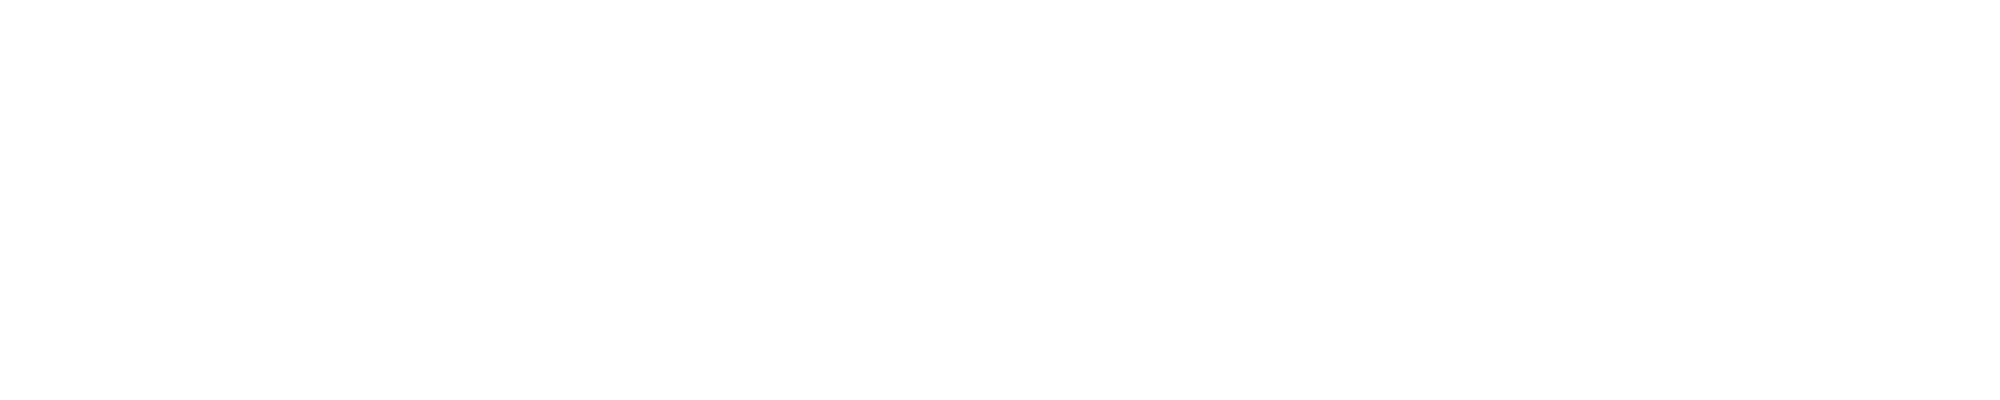

In [51]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [52]:
encoder = Model(input_img, encoded)

In [53]:
encodes = encoder.predict(x_train)

In [54]:
encodes.shape

(5000, 4, 4, 8)

In [55]:
w = encodes.reshape(5000, 128)

In [56]:
from sklearn.decomposition import PCA

In [57]:
from sklearn.manifold import TSNE

In [58]:
pca_1 = PCA(n_components = 30)

In [59]:
plot_pcs = pca_1.fit_transform(w)

In [60]:
pc_df = pd.DataFrame(plot_pcs)
pc_df['label'] = df['label']

In [61]:
class_colors = ["C" + str(i) for i in df['label']]

In [62]:
plot_pcs.shape

(5000, 30)

In [63]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


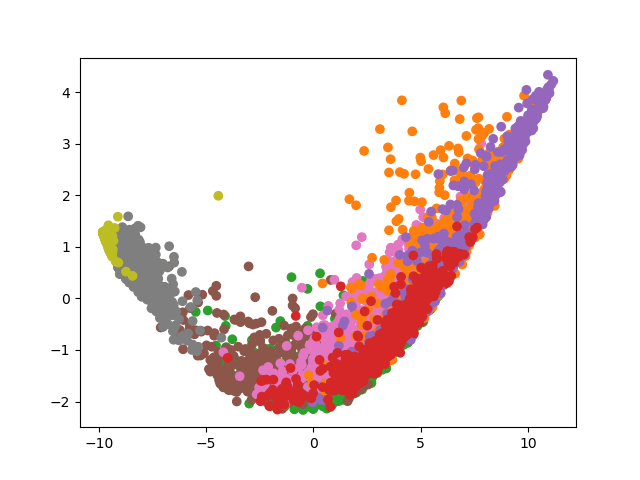

In [70]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(plot_pcs[:, 0], plot_pcs[:, 1], c = class_colors)

In [65]:
tsne = TSNE(n_components = 3)

In [66]:
a_tsne = tsne.fit_transform(plot_pcs)

<IPython.core.display.Javascript object>


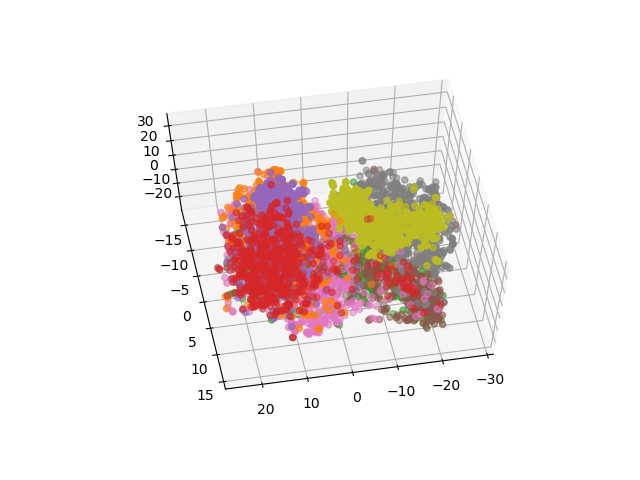

In [67]:
#% matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a_tsne[:, 0], a_tsne[:, 1], a_tsne[:,2], c = class_colors)